# Проект по анализу данных

Выполнила команда MDS   

участники: 
   
   Абдугаффорова Дилноза                            
   Батмунх Мунхгэрэл                     
   Хасанова Саида

# Шаг 1: Выбор темы

Нам было интересно работать с продажами и предсказывать доходности для товаров, поэтому для нашего исследования мы решили проанализировать рынок электроники, так как он достаточно обширный и включает в себя разные виды электронных устройств.

# Шаг 2: Сбор данных

Для исследования мы взяли данные из kaggle. Здесь представлены данные о продажах магазина электроники за 12 месяцев. Датасет представляет собой следующие колонки:

* `Order Id` – номер заказа
* `Product` – название электронного прибора/устройства
* `Quantity Ordered` – количество
* `Price Each` – цена товара
* `OrderDate` – дата заказа
* `Address` – город продажи

# Шаг 3: Предварительная обработка 

В kaggle мы нашли 12 файлов, в котором были данные о продаже на каждый месяц отдельно; в таблицах были пропуски, а количество и цена имели тип object, поэтому на данном этапе объединили для начала все файлы, заполнили пропуски и изменили тип числовых значений на float

In [969]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statistics

import random
from sklearn import preprocessing
import scipy.stats as sp
np.random.seed(42)
from scipy.stats import norm   
from scipy.stats import ttest_ind
from tqdm import tqdm
import math
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # подгрузили модель
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV    #Подгружаем Gridsearch, регрессии

# Отключение некоторых лишних предупреждений
import warnings
warnings.filterwarnings("ignore")

In [970]:
all_files = os.listdir('sales')
csv_files = []
for file in all_files:
    if file[-3:] == 'csv':
        csv_files.append(file)
    else: 
        pass

csv_files

['Sales_01_2019.csv',
 'Sales_02_2019.csv',
 'Sales_03_2019.csv',
 'Sales_04_2019.csv',
 'Sales_05_2019.csv',
 'Sales_06_2019.csv',
 'Sales_07_2019.csv',
 'Sales_08_2019.csv',
 'Sales_09_2019.csv',
 'Sales_10_2019.csv',
 'Sales_11_2019.csv',
 'Sales_12_2019.csv']

In [971]:
all_data =all_data.dropna(how="all")
all_data = all_data[all_data['Order Date'].str[0:2]!="Or"]

In [972]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
all_data['Price Each'] = all_data['Price Each'].astype(float)

Добавили новую колонку Months, чтобы работать с месяцами отдельно

In [973]:
all_data['Months'] = all_data['Order Date'].str[0:2]
all_data['Months']  = all_data['Months'].astype(int)

In [974]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,income,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco


In [975]:
all_data.isnull().sum()  # пропусков больше нет

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Months              0
income              0
city                0
dtype: int64

Наши данные готовы, приступаем к анализу.

# Шаг 4. Визуализация

### 1. Объем продаж  

Интересно узнать, в каких месяцах спрос на электроннные товары увеличивается и в каких падает, когда люди начинают покупать себе новые айфоны:) Для этого построим график, отражающий динамику количества проданных товаров в каждом месяце.

In [976]:
graf_1=all_data.groupby('Months')['Quantity Ordered'].sum()

Text(0.5, 1.0, 'График объема продаж')

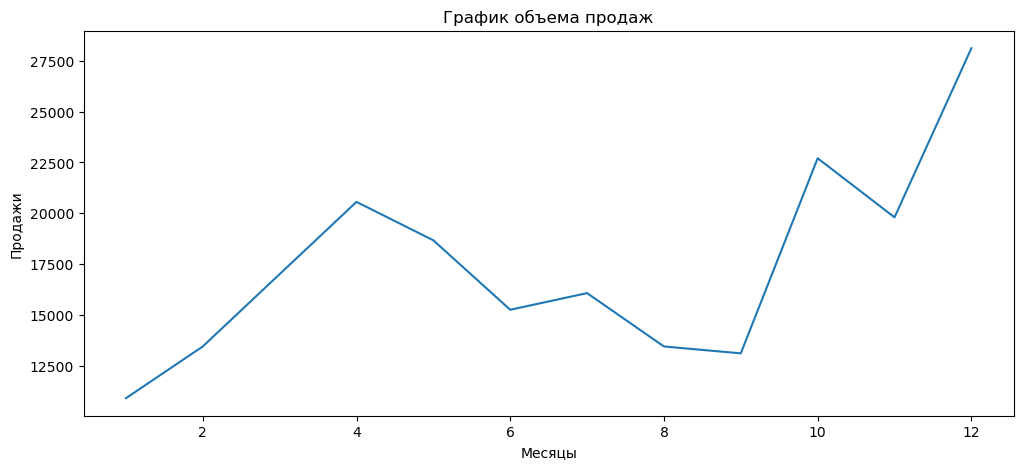

In [977]:
graf_1.plot(figsize=(12, 5))
plt.xlabel('Месяцы')
plt.ylabel('Продажи')
plt.title('График объема продаж')

Больше всего продажи проходят в декабре, возможно люди покупают подарки на Новый год)  Также продажи увеличиваются в марте и к началу октября, возможно тоже из за праздников или скидок в магазине.

### 2. Популярные товары


Какая электроника наиболее популярна? Что люди больше всего покупают? Ответим на эти вопросы с помощью следующего графика.
Посмотрим, из каких уникальных электроник состоят наши данные и сколько было продано в течении года этих товаров.

Text(0.5, 1.0, 'Продажи товаров в течении года')

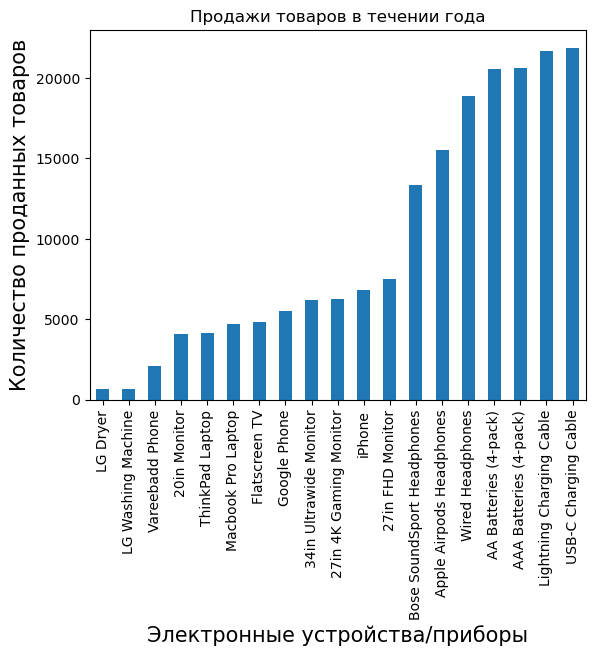

In [978]:
bar = all_data.groupby('Product')['Quantity Ordered'].count()
bar.sort_values().plot(kind='bar')

plt.xlabel('Электронные устройства/приборы', fontsize=15)
plt.ylabel('Количество проданных товаров', fontsize=15)
plt.title('Продажи товаров в течении года')

Видимо, кабели и провода для телефонов слишком часто ломаются или теряются (￢_￢) Также на втором месте у нас батарейки, наверняка для пульта от телевизора :D

### 3. Товары-сотоварищи


В большинстве случаев, на рынке электроники, люди покупают какой-то один товар, но в нашем датасете есть товары, которые покупались вместе. Это можно определить по номеру заказа, давайте найдем два товара, которые чаще всего покупались вместе и затем 

In [979]:
all_tablecorr = pd.pivot_table(all_data, index = 'Order ID', values = 'Quantity Ordered', columns = 'Product', aggfunc = np.sum)
all_tablecorr = all_tablecorr.fillna(0)
all_tablecorr[all_tablecorr !=0] = 1
Rcorr = all_tablecorr.corr()-np.eye(19)
twoprod = Rcorr.max().values.max()
twoprod  # не такая уж и большая корреляция \_(*_*)_/

0.03165371523479869

In [980]:
all_tablecorr.corr()[all_tablecorr.corr()==twoprod].stack().index.tolist()[0] # а вот и комплект, которого мы искали)

('Google Phone', 'USB-C Charging Cable')

Построим тепловую карту и увидим как коррелируются между собой все товары.

<AxesSubplot:xlabel='Product', ylabel='Product'>

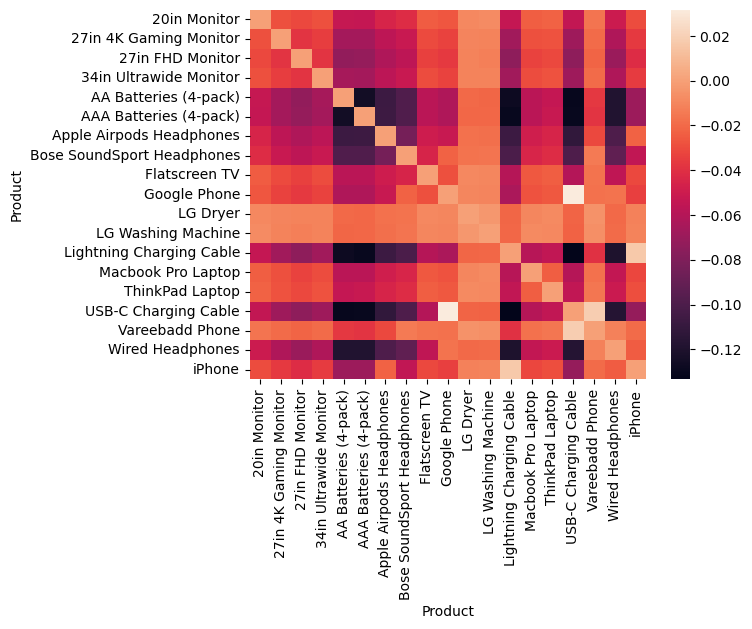

In [981]:
sns.heatmap(Rcorr)

Остальные визуализации будут с появлением новых признаков (◕‿◕)♡

# Шаг 5. Создание новых признаков

### 1. Доход от продажи

Один из важных признаков, которого не хватает в нашей таблице - это выручка, или доход от продажи электроники. Считаем и добавляем новую колонку

In [982]:
all_data['income']=all_data['Quantity Ordered']*all_data['Price Each']

In [983]:
graf_2=all_data.groupby('Months')['income'].mean()

Text(0.5, 1.0, 'График дохода от продаж')

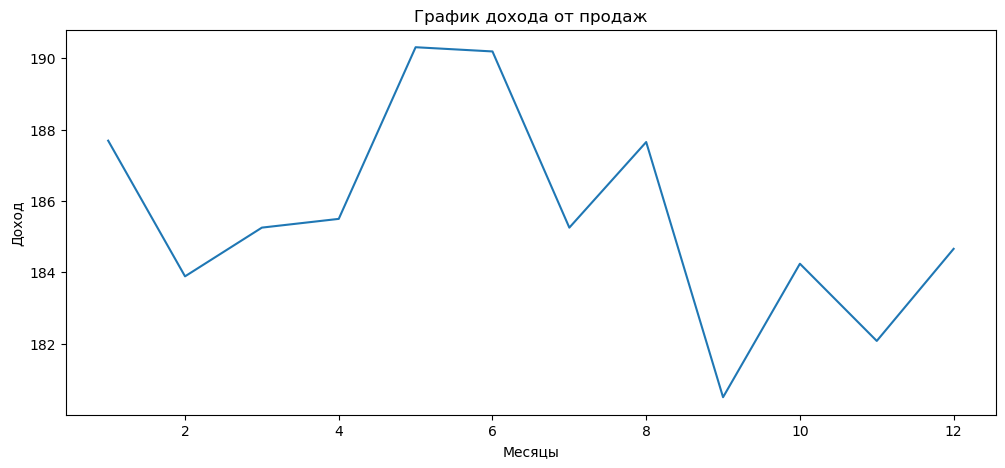

In [984]:
graf_2.plot(figsize=(12, 5))
plt.ticklabel_format(style='plain')
plt.xlabel('Месяцы')
plt.ylabel('Доход')
plt.title('График дохода от продаж')

В целом, график доходов выглядит аналогично графику объема продаж, но нам было необходимо посмотреть что происходило с доходом в течении года, так как наша цель - предсказывать доход на следующий месяц.

### 2. Города     

В нашей таблице есть адреса, где заказаны товары. Покупки совершаются в 9 крупных городах. Посмотрим на гистограмме в каких городах больше всего покупаются электронные товары.

In [985]:
city=all_data['Purchase Address'].str.split(',').str[1]
city.value_counts()

 San Francisco    44732
 Los Angeles      29605
 New York City    24876
 Boston           19934
 Atlanta          14881
 Dallas           14820
 Seattle          14732
 Portland         12465
 Austin            9905
Name: Purchase Address, dtype: int64

In [986]:
all_data['city'] = city

Text(0.5, 1.0, 'Доходы от продажи в города')

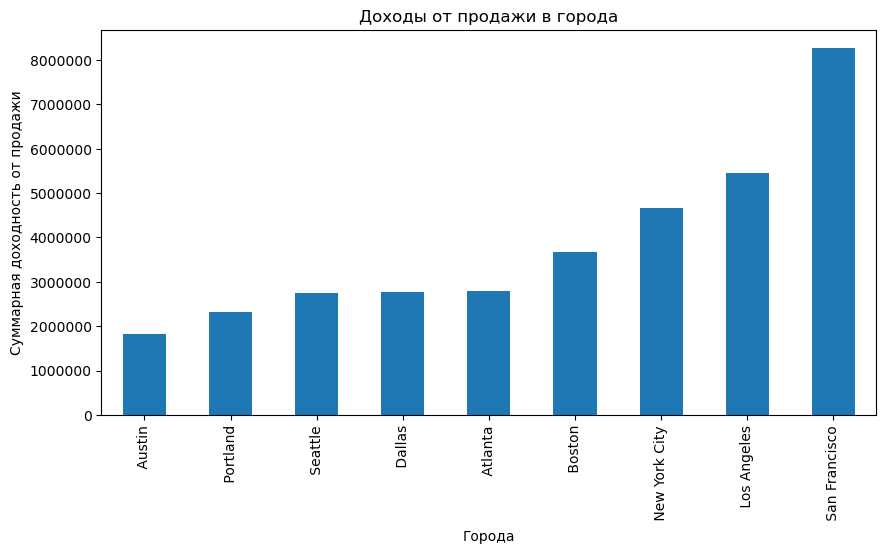

In [987]:
bar_1 = all_data.groupby('city')['income'].sum()
plt.ticklabel_format(style='plain')
bar_1.sort_values().plot(figsize=(10, 5), kind='bar')

plt.xlabel('Города')
plt.ylabel('Суммарная доходность от продажи')
plt.title('Доходы от продажи в города')

Зная эту информацию, владелец магазина электроники может решить, в каких городах ему стоит продвигать свои товары и где рекламировать больше всего

# Шаг 6. Гипотезы

Мы уже посмотрели на графиках как меняется доход в каждом месяце, какие продукты более популярны и в каких городах товары больше всего продаются, теперь проверим это с помощью математической статистики.

##### Проверяем гипотезу о том, что средняя доходность в каждом месяце больше 180.

Уровень значимости: $5\%$

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu \le 180 \hspace{2mm} \ \\
&H_1: \hspace{2mm} \mu > 180  \hspace{2mm} \
\end{aligned}
$$

In [988]:
#Правосторонняя альтернативная гипотеза, матожидание и дисперсия неизвестно, выборки большие используем Z статистику
alpha95 = 0.05                            
z_crit95 = stats.norm.ppf(1 - alpha95)
for i in range(1,13):
    m=all_data.loc[all_data['Months']==i]['income']
    z_p=((m.mean()-180)*np.sqrt(len(m)))/np.sqrt(statistics.variance(m))
    if z_p< z_crit95:
        print("Ho не отвергается ")
    else:
        print("Ho отвергается ")

Ho отвергается 
Ho не отвергается 
Ho отвергается 
Ho отвергается 
Ho отвергается 
Ho отвергается 
Ho отвергается 
Ho отвергается 
Ho не отвергается 
Ho отвергается 
Ho не отвергается 
Ho отвергается 


##### Проверяем гипотезу о том, что средняя доходность в каждом месяце равно 185.

Уровень значимости: $5\%$

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu = 185 \hspace{2mm} \ \\
&H_1: \hspace{2mm} \mu \neq 185  \hspace{2mm} \
\end{aligned}
$$

In [989]:
#Двухсторонняя альтернативная гипотеза, матожидание и дисперсия неизвестно, выборки большие, используем Z статистику
alpha95 = 0.05                                
z_crit95 = stats.norm.ppf(1 - alpha95/2)
for i in range(1,13):
    m = all_data.loc[all_data['Months']==i]['income']
    z_p = ((m.mean()-185)*np.sqrt(len(m)))/np.sqrt(statistics.variance(m))
    if z_p > -z_crit95 and z_p< z_crit95:
        print("Ho не отвергается ")
    else:
        print("Ho отвергается ")

Ho не отвергается 
Ho не отвергается 
Ho не отвергается 
Ho не отвергается 
Ho отвергается 
Ho не отвергается 
Ho не отвергается 
Ho не отвергается 
Ho не отвергается 
Ho не отвергается 
Ho не отвергается 
Ho не отвергается 


##### Для проверки гипотезы о том, что определенный тип электронных приборов продается лучше, чем другие типы, можно использовать t-тест для сравнения средних значений продаж разных типов продуктов. Предположим, что мы хотим сравнить продажи между типами продуктов "Macbook Pro Laptop" и "iPhone". 

In [990]:
# Выбираем только продажи телефонов и ноутбуков
mac = all_data[all_data['Product'] == 'Macbook Pro Laptop']['Quantity Ordered']
iphone = all_data[all_data['Product'] == 'iPhone']['Quantity Ordered']
# Проверяем гипотезу о равенстве средних значений продаж двух типов продуктов
t_stat, p_value = ttest_ind(mac, iphone)

# Выводим результаты теста
print("t-статистика:", t_stat)
print("p-значение:", p_value)
if p_value < 0.05:
    print("Результат статистически значим: продажи различаются между типами продуктов")
else:
    print("Результат статистически незначим: продажи не различаются между типами продуктов")

t-статистика: -0.30241464412063684
p-значение: 0.7623414316283553
Результат статистически незначим: продажи не различаются между типами продуктов


##### Теперь сравним Macbook Pro Laptop и Apple Airpods Headphones и проверим гипотезу

In [1028]:
air = all_data[all_data['Product'] == 'Apple Airpods Headphones']['Quantity Ordered']
mac = all_data[all_data['Product'] == 'Macbook Pro Laptop']['Quantity Ordered']
# Проверяем гипотезу о равенстве средних значений продаж двух типов продуктов
t_stat, p_value = ttest_ind(mac, air)

# Выводим результаты теста
print("t-статистика:", t_stat)
print("p-значение:", p_value)
if p_value < 0.05:
    print("Результат статистически значим: продажи различаются между типами продуктов")
else:
    print("Результат статистически незначим: продажи не различаются между типами продуктов")

t-статистика: -5.032036597323782
p-значение: 4.894469180974062e-07
Результат статистически значим: продажи различаются между типами продуктов


##### Проверим гипотезу о том, что продажи электронных приборов в разных городах не отличаются друг от друга.

In [1038]:
# разделение данных на две выборки по городам
LA = all_data[all_data['city'] == 'Los Angeles']['income']
NY = all_data[all_data['city'] == 'New York City']['income']

# тестирование гипотезы
t_statistic, p_value = ttest_ind(LA, NY)

# вывод результатов
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: продажи в городах отличаются друг от друга")
else:
    print("Не отвергаем нулевую гипотезу: продажи в городах не отличаются друг от друга")

Не отвергаем нулевую гипотезу: продажи в городах не отличаются друг от друга


# Шаг 7. Машинное обучение

In [991]:
income_table = pd.pivot_table(all_data, index=["Product"], values=["income"], columns=['Months'], aggfunc=np.sum)
income_table

income                                   \
Months                             1          2          3          4    
Product                                                                  
20in Monitor                 23977.82   27057.54   35856.74   43226.07   
27in 4K Gaming Monitor      122066.87  166525.73  186805.21  220734.34   
27in FHD Monitor             63295.78   71245.25   91193.92  110392.64   
34in Ultrawide Monitor      119316.86  158835.82  198354.78  248513.46   
AA Batteries (4-pack)         5468.16    6662.40    8509.44   10832.64   
AAA Batteries (4-pack)        4784.00    5896.28    7412.21    8787.61   
Apple Airpods Headphones    122700.00  151800.00  198300.00  227850.00   
Bose SoundSport Headphones   66193.38   84091.59  119788.02  128687.13   
Flatscreen TV                73200.00   93900.00  108600.00  138000.00   
Google Phone                191400.00  228600.00  277800.00  348000.00   
LG Dryer                     23400.00   22800.00   29400.00   46800.00   
LG Washing Machine           25200.00   24000.00   38400.00   36600.00   
Lightning Charging Cable     17267.25   22410.05   28001.35   35476.35   
Macbook Pro Laptop          399500.00  469200.00  644300.00  771800.00   
ThinkPad Laptop             218997.81  274997.25  344996.55  389996.10   
USB-C Charging Cable         15379.65   19765.30   23230.80   27114.55   
Vareebadd Phone              50400.00   51600.00   69600.00   88000.00   
Wired Headphones             13009.15   15335.21   19951.36   24759.35   
iPhone                      266700.00  307300.00  376600.00  485100.00   

                                                                        \
Months                             5          6          7          8    
Product                                                                  
20in Monitor                 37506.59   35416.78   35966.73   28707.39   
27in 4K Gaming Monitor      211374.58  175885.49  188365.17  171595.60   
27in FHD Monitor            103343.11   85044.33   91043.93   73645.09   
34in Ultrawide Monitor      206714.56  172895.45  175555.38  144396.20   
AA Batteries (4-pack)         9154.56    8048.64    7952.64    7019.52   
AAA Batteries (4-pack)        8751.73    6464.38    7071.35    6042.79   
Apple Airpods Headphones    204750.00  175050.00  183000.00  151350.00   
Bose SoundSport Headphones  117588.24   98290.17  105989.40   88091.19   
Flatscreen TV               119700.00  110100.00  119700.00   99300.00   
Google Phone                288000.00  234600.00  246600.00  216600.00   
LG Dryer                     45600.00   25800.00   33000.00   27600.00   
LG Washing Machine           38400.00   33000.00   31200.00   28800.00   
Lightning Charging Cable     31021.25   25220.65   27074.45   21572.85   
Macbook Pro Laptop          790500.00  605200.00  625600.00  508300.00   
ThinkPad Laptop             370996.29  313996.86  318996.81  273997.26   
USB-C Charging Cable         24712.60   20016.25   22095.55   17470.90   
Vareebadd Phone              74000.00   62000.00   58400.00   57200.00   
Wired Headphones             22493.24   17673.26   18764.35   15479.09   
iPhone                      448000.00  373100.00  351400.00  307300.00   

                                                                         
Months                             9          10         11          12  
Product                                                                  
20in Monitor                 30467.23   47185.71   46195.80    62584.31  
27in 4K Gaming Monitor      148586.19  281962.77  224244.25   336951.36  
27in FHD Monitor             72445.17  118642.09  107842.81   144290.38  
34in Ultrawide Monitor      144016.21  254973.29  209374.49   322611.51  
AA Batteries (4-pack)         6800.64   11289.60   10080.00    14300.16  
AAA Batteries (4-pack)        5749.77   10055.37    9044.75    12680.59  
Apple Airpods Headphones    145350.00  250650.00  226950.00   311400.00  
Bose SoundSport Headphones   8279

In [992]:
df_train, df_test = train_test_split(income_table, test_size=0.2, random_state=20)

In [993]:
df_train[('income', 12)]

Product
iPhone                         634200.00
Vareebadd Phone                113600.00
ThinkPad Laptop                538994.61
AAA Batteries (4-pack)          12680.59
Flatscreen TV                  199800.00
Macbook Pro Laptop            1093100.00
20in Monitor                    62584.31
27in FHD Monitor               144290.38
Bose SoundSport Headphones     182381.76
Apple Airpods Headphones       311400.00
LG Washing Machine              48000.00
AA Batteries (4-pack)           14300.16
Google Phone                   429000.00
USB-C Charging Cable            38837.50
34in Ultrawide Monitor         322611.51
Name: (income, 12), dtype: float64

In [994]:
y_train = df_train[('income', 12)]  # колонка '12'. Целевые метки на трейне 
X_train = df_train.drop(('income', 12), axis=1) # все колонки кроме '12'-a. Признаки на трейне.

y_test = df_test[('income', 12)]   # колонка '12'. Целевые метки на тесте
X_test = df_test.drop(('income', 12), axis=1)   # все колонки кроме '12'-a. Признаки на тесте.

In [995]:
# разбили на тест и трейн

In [996]:
y_train

Product
iPhone                         634200.00
Vareebadd Phone                113600.00
ThinkPad Laptop                538994.61
AAA Batteries (4-pack)          12680.59
Flatscreen TV                  199800.00
Macbook Pro Laptop            1093100.00
20in Monitor                    62584.31
27in FHD Monitor               144290.38
Bose SoundSport Headphones     182381.76
Apple Airpods Headphones       311400.00
LG Washing Machine              48000.00
AA Batteries (4-pack)           14300.16
Google Phone                   429000.00
USB-C Charging Cable            38837.50
34in Ultrawide Monitor         322611.51
Name: (income, 12), dtype: float64

In [997]:
X_test

income                                   \
Months                           1          2          3          4    
Product                                                                
Lightning Charging Cable   17267.25   22410.05   28001.35   35476.35   
27in 4K Gaming Monitor    122066.87  166525.73  186805.21  220734.34   
LG Dryer                   23400.00   22800.00   29400.00   46800.00   
Wired Headphones           13009.15   15335.21   19951.36   24759.35   

                                                                      \
Months                           5          6          7          8    
Product                                                                
Lightning Charging Cable   31021.25   25220.65   27074.45   21572.85   
27in 4K Gaming Monitor    211374.58  175885.49  188365.17  171595.60   
LG Dryer                   45600.00   25800.00   33000.00   27600.00   
Wired Headphones           22493.24   17673.26   18764.35   15479.09   

                                                           
Months                           9          10         11  
Product                                                    
Lightning Charging Cable   21408.40   38451.40   33039.50  
27in 4K Gaming Monitor    148586.19  281962.77  224244.25  
LG Dryer                   18000.00   30000.00   33600.00  
Wired Headphones           15598.99   27265.26   23188.66

In [998]:
# LinearRegression- т.е. подгрузили экземпляр нашей модели
model = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
model.fit(X_train,y_train)    # обучали модель с дефолтными параметрами

LinearRegression()

In [999]:
model.coef_     

array([-2.47371727,  0.0942572 , -0.43905607,  0.75457986,  0.20469884,
        0.26281327, -1.81335759,  2.38428095,  1.91098806,  0.05941305,
        0.4688455 ])

In [1000]:
model.intercept_

-11.519184776581824

##### Вывод
1. Коэффициенты не равные нулю, поэтому существует зависимость между доходами каждого товара периода с января до ноября и доходами для каждого товара за декабрь 2019-го года.
2. Согласено моделю, который с дефолтными параметрами и вообще над ним не разработали: 
Если доход каждого товара за январь растет на 1000 долларов, то доход каждого товара за декабрь уменьшается на 2473 долларов.
Если доход каждого товара за ноябрь растет на 1000 долларов, то доход каждого товара за декабрь увеличивается на 468.85  долларов.

In [1001]:
y_test_pred = model.predict(X_test)
y_test_pred          # получаем предсказания

array([ 47866.61499376, 361156.02156592,  40672.23818714,  33606.54178114])

In [1002]:
y_train_pred = model.predict(X_train)
y_train_pred

array([ 634236.86563887,  112276.84981931,  538843.74346758,
         12987.53096137,  199941.60223123, 1093169.67100231,
         62995.05158643,  143441.54860241,  182032.38652365,
        311630.3301562 ,   49121.73084022,   16225.14772719,
        429515.14537571,   36908.94960443,  322454.26646308])

In [1003]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("Test MSE = %.4f" % mean_squared_error(y_test, y_test_pred))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))   

Test MSE = 177160878.1704
Train MSE = 795437.7416


In [1004]:
print("Test MAE = %.4f" % mean_absolute_error(y_test, y_test_pred))
print("Train MAE = %.4f" % mean_absolute_error(y_train, y_train_pred))

Test MAE = 9373.6050
Train MAE = 634.4021


In [1005]:
print("Test MAPE = %.4f" % mean_absolute_percentage_error(y_test, y_test_pred))
print("Train MAPE = %.4f" % mean_absolute_percentage_error(y_train, y_train_pred))

Test MAPE = 0.0851
Train MAPE = 0.0174


Вывод: Получается, что наша модель дает большую ошибку (среднюю квадратичную ошибку). Тогда можем сказать, что наша модель имеет плохое качество.
У нас MSE, MAE, MAPE на тесте значительно больше, чем на трейне. Скорее всего модель переобучилась. Поэтому добавим регуляризацию и отнормируем данные.

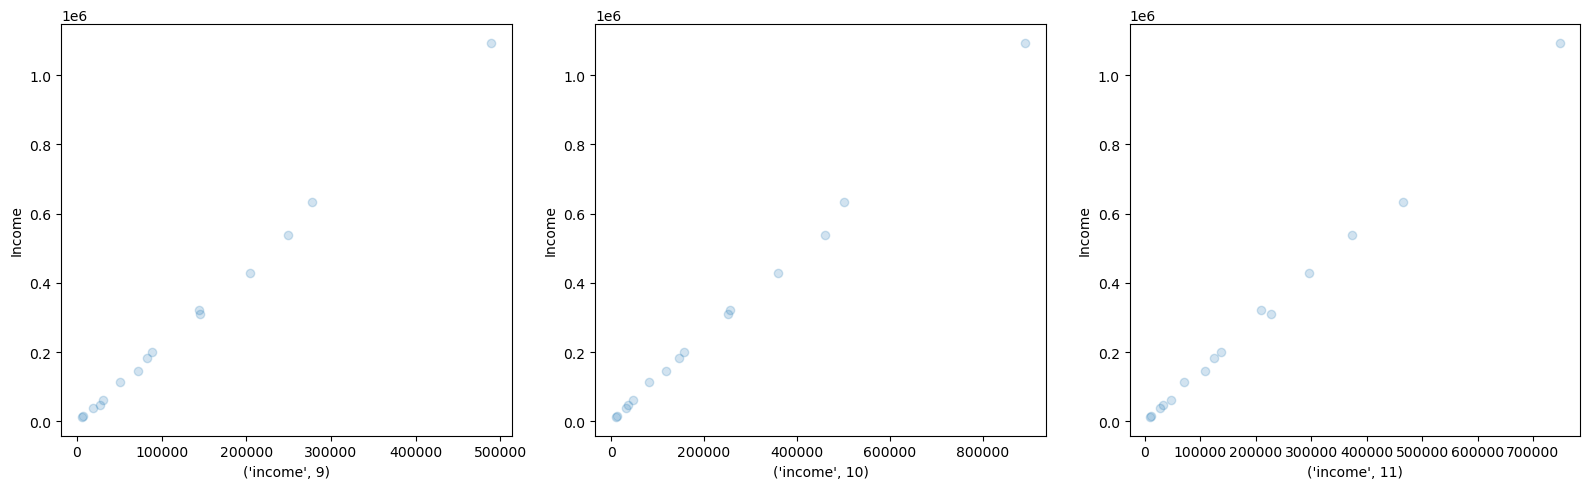

In [1006]:
fig, axs = plt.subplots(figsize=(16, 5), ncols=3)
for i, feature in enumerate([ ('income',  9),('income', 10), ('income', 11)]):
    axs[i].scatter(X_train[feature], y_train, alpha=0.2)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("Income")
plt.tight_layout()    

### Описание графиков:
Если посмотреть на облака рассеивания, видно, что между доходами для каждого товара  за сентябрь, октябрь, ноябрь 2019-го года и доходами для каждого товара  за декабрь 2019-го года есть линейная связь.

###### Хотим добиться как можно высокого результата

##### Нормировка данных

In [1007]:
scaler = StandardScaler()   

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [1008]:
X_train_scaled

array([[ 1.42600345,  1.34414464,  1.20433235,  1.34723495,  1.25130314,
         1.34503475,  1.17407148,  1.27374532,  1.17910408,  1.17455387,
         1.36652519],
       [-0.53945732, -0.61272449, -0.58119493, -0.55726604, -0.5589144 ,
        -0.57837059, -0.61114641, -0.5632181 , -0.58991483, -0.60466561,
        -0.60823029],
       [ 0.99254629,  1.09693207,  1.02052511,  0.8911144 ,  0.87859333,
         0.97962397,  0.97664228,  1.02913951,  0.954361  ,  1.00423762,
         0.90871543],
       [-0.95395782, -0.96249453, -0.94288221, -0.93717054, -0.87472607,
        -0.92172484, -0.92388642, -0.93896349, -0.93711087, -0.90605111,
        -0.91720297],
       [-0.33227976, -0.28900308, -0.35436899, -0.31746486, -0.33771937,
        -0.28098776, -0.23765202, -0.25399715, -0.29598553, -0.28271161,
        -0.27201653],
       [ 2.63272185,  2.58316346,  2.76128887,  2.72225494,  2.90905583,
         2.78001508,  2.84474296,  2.75007338,  2.82526365,  2.83219336,
         2.779

In [1009]:
y_train

Product
iPhone                         634200.00
Vareebadd Phone                113600.00
ThinkPad Laptop                538994.61
AAA Batteries (4-pack)          12680.59
Flatscreen TV                  199800.00
Macbook Pro Laptop            1093100.00
20in Monitor                    62584.31
27in FHD Monitor               144290.38
Bose SoundSport Headphones     182381.76
Apple Airpods Headphones       311400.00
LG Washing Machine              48000.00
AA Batteries (4-pack)           14300.16
Google Phone                   429000.00
USB-C Charging Cable            38837.50
34in Ultrawide Monitor         322611.51
Name: (income, 12), dtype: float64

In [1010]:
model_ridge = Ridge()   #подгрузили экземпляр модели
model_ridge.fit(X_train_scaled,y_train)
model_ridge                                              

Ridge()

In [1011]:
y_test_predr = model_ridge.predict(X_test_scaled)
y_test_predr  

array([ 45514.063253  , 323333.86998128,  51020.83975746,  32098.52619079])

In [1012]:
y_train_predr = model_ridge.predict(X_train_scaled)
y_train_predr  

array([ 640521.43985717,  109581.68378071,  553815.05555937,
         11518.65349006,  191995.08033012, 1071491.32897528,
         59907.69197864,  152269.82712764,  178833.4036472 ,
        313987.45519393,   54222.66335837,   13345.12484813,
        444771.05352592,   37437.37261852,  312082.98570895])

In [1013]:
print("Test MSE = %.4f" % mean_squared_error(y_test, y_test_predr))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_predr))  

Test MSE = 46729929.9426
Train MSE = 86416410.8993


In [1014]:
print("Test MAE = %.4f" % mean_absolute_error(y_test, y_test_predr))
print("Train MAE = %.4f" % mean_absolute_error(y_train, y_train_predr))

Test MAE = 3923.8052
Train MAE = 7160.3339


In [1015]:
print("Test MAPE = %.4f" % mean_absolute_percentage_error(y_test, y_test_predr))
print("Train MAPE = %.4f" % mean_absolute_percentage_error(y_train, y_train_predr))   

Test MAPE = 0.0229
Train MAPE = 0.0434


Модель немного усложняли. MAPE данных на тесте и трейне раньше было 0.0851 и 0.0174 соответственно. Это означает переобучение модели. Модель работает на трейне хорошее, чем на тесте. А мы хотим, чтобы разница ошибок на трейне и тесте по возможности ближе друг к другу.
Чтобы модель более качественно получилась, подбирем параметры по сетке.

##### Подбор параметров

Сначала подберем солвер, так как некоторые параметры не всегда могут работать с любыми солверами

In [1016]:
parameters = {'solver' :['sparse_cg', 'cholesky', 'svd' 'lsqr', 'sag', 'saga']}   
grid = GridSearchCV(model_ridge, parameters, scoring= 'neg_root_mean_squared_error', cv=2)
grid.fit(X_train_scaled,y_train)
print('Комбинация параметров, которая лучше всего даст neg_root_mean_squared_error: : ')
print(grid.best_params_)
print('Наилучшая neg_root_mean_squared_error, полученная после перебора параметров с помощью поиска по сетке : ', grid.best_score_)

Комбинация параметров, которая лучше всего даст neg_root_mean_squared_error: : 
{'solver': 'sparse_cg'}
Наилучшая neg_root_mean_squared_error, полученная после перебора параметров с помощью поиска по сетке :  -20151.98910340833


In [1017]:
model_r1 = Ridge(solver='sparse_cg')

In [1018]:
other_parameters = {'alpha':[0, 0,5, 1, 1.5]}                                # подберем остальные параметры
grid_solver = GridSearchCV(estimator=model_r1, n_jobs=-1, param_grid = other_parameters, scoring='neg_root_mean_squared_error')
grid_solver.fit(X_train_scaled, y_train)
print('Комбинация параметров, которая лучше всего даст neg_root_mean_squared_error:: ')
print(grid_solver.best_params_)
print('Лучшая MSE: ', grid_solver.best_score_)

Комбинация параметров, которая лучше всего даст neg_root_mean_squared_error:: 
{'alpha': 0}
Лучшая MSE:  -14387.692565160081


###### Проверяем результаты подбора параметров

In [1019]:
model_ridgep = Ridge(solver='sparse_cg', alpha=0)
model_ridgep

Ridge(alpha=0, solver='sparse_cg')

In [1020]:
model_ridgep.fit(X_train_scaled,y_train) 
y_pred_test_ridgep = model_ridgep.predict(X_test_scaled)
y_pred_train_ridgep = model_ridgep.predict(X_train_scaled)

In [1021]:
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred_test_ridgep))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_pred_train_ridgep))  

Test MSE = 62738106.4849
Train MSE = 33261769.3173


In [1022]:
print("Test MAE = %.4f" % mean_absolute_error(y_test, y_pred_test_ridgep))
print("Train MAE = %.4f" % mean_absolute_error(y_train, y_pred_train_ridgep))

Test MAE = 4914.6137
Train MAE = 4063.1196


In [1023]:
print("Test MAPE = %.4f" % mean_absolute_percentage_error(y_test, y_pred_test_ridgep))
print("Train MAPE = %.4f" % mean_absolute_percentage_error(y_train, y_pred_train_ridgep))   

Test MAPE = 0.0354
Train MAPE = 0.0376


Вывод: Этот результат похож на наш желаемый результат, так как мы раньше хотели обучить модель, которая делает MAPE на тесте и на трейне как можно ближе друг к другу и при этом она была меньше. Так и получилась с помощью перебор по сетке. 

### Графики

In [1024]:
train = pd.DataFrame({'y': y_pred_train_ridgep.astype(np.int64)})   # Соединяем с таблицей о доходах то, что мы получили в результате ML, т.е. предсказуемые доходности за январь 2020 года для каждого продукта. 
test = pd.DataFrame({'y':y_pred_test_ridgep.astype(np.int64)})   
Январь_2020 = train.append(test, ignore_index=True)
Январь_2020 = Январь_2020.set_index(income_table.index)
income_table['Январь_2020'] = Январь_2020
income_table

income                                   \
Months                              1          2          3          4   
Product                                                                  
20in Monitor                 23977.82   27057.54   35856.74   43226.07   
27in 4K Gaming Monitor      122066.87  166525.73  186805.21  220734.34   
27in FHD Monitor             63295.78   71245.25   91193.92  110392.64   
34in Ultrawide Monitor      119316.86  158835.82  198354.78  248513.46   
AA Batteries (4-pack)         5468.16    6662.40    8509.44   10832.64   
AAA Batteries (4-pack)        4784.00    5896.28    7412.21    8787.61   
Apple Airpods Headphones    122700.00  151800.00  198300.00  227850.00   
Bose SoundSport Headphones   66193.38   84091.59  119788.02  128687.13   
Flatscreen TV                73200.00   93900.00  108600.00  138000.00   
Google Phone                191400.00  228600.00  277800.00  348000.00   
LG Dryer                     23400.00   22800.00   29400.00   46800.00   
LG Washing Machine           25200.00   24000.00   38400.00   36600.00   
Lightning Charging Cable     17267.25   22410.05   28001.35   35476.35   
Macbook Pro Laptop          399500.00  469200.00  644300.00  771800.00   
ThinkPad Laptop             218997.81  274997.25  344996.55  389996.10   
USB-C Charging Cable         15379.65   19765.30   23230.80   27114.55   
Vareebadd Phone              50400.00   51600.00   69600.00   88000.00   
Wired Headphones             13009.15   15335.21   19951.36   24759.35   
iPhone                      266700.00  307300.00  376600.00  485100.00   

                                                                        \
Months                              5          6          7          8   
Product                                                                  
20in Monitor                 37506.59   35416.78   35966.73   28707.39   
27in 4K Gaming Monitor      211374.58  175885.49  188365.17  171595.60   
27in FHD Monitor            103343.11   85044.33   91043.93   73645.09   
34in Ultrawide Monitor      206714.56  172895.45  175555.38  144396.20   
AA Batteries (4-pack)         9154.56    8048.64    7952.64    7019.52   
AAA Batteries (4-pack)        8751.73    6464.38    7071.35    6042.79   
Apple Airpods Headphones    204750.00  175050.00  183000.00  151350.00   
Bose SoundSport Headphones  117588.24   98290.17  105989.40   88091.19   
Flatscreen TV               119700.00  110100.00  119700.00   99300.00   
Google Phone                288000.00  234600.00  246600.00  216600.00   
LG Dryer                     45600.00   25800.00   33000.00   27600.00   
LG Washing Machine           38400.00   33000.00   31200.00   28800.00   
Lightning Charging Cable     31021.25   25220.65   27074.45   21572.85   
Macbook Pro Laptop          790500.00  605200.00  625600.00  508300.00   
ThinkPad Laptop             370996.29  313996.86  318996.81  273997.26   
USB-C Charging Cable         24712.60   20016.25   22095.55   17470.90   
Vareebadd Phone              74000.00   62000.00   58400.00   57200.00   
Wired Headphones             22493.24   17673.26   18764.35   15479.09   
iPhone                      448000.00  373100.00  351400.00  307300.00   

                                                                         \
Months                              9         10         11          12   
Product                                                                   
20in Monitor                 30467.23   47185.71   46195.80    62584.31   
27in 4K Gaming Monitor      148586.19  281962.77  224244.25   336951.36   
27in FHD Monitor             72445.17  118642.09  107842.81   144290.38   
34in Ultrawide Monitor      144016.21  254973.29  209374.49   322611.51   
AA Batteries (4-pack)         6800.64   11289.60   10080.00    14300.16   
AAA Batteries (4-pack)        5749.77   10055.37    9044.75    12680.59   
Apple Airpods Headphones    145350.00  250650.00  226950.00   311400.00   
Bose SoundSport Headpho

# Вывод:

##### На этом наше исследование закончилось. В рамках нашего проекта мы проанализировали данные о продаже товаров на рынке электроники. Мы сделали разведочный анализ данных (EDA). Рассчитали объем продаж электроник, посмотрели как доходы меняются в зависимости от времени, нашли самые популярные товары и какие электронные устройства или приборы чаще покупаются вместе. Сделали гипотезы на основе созданных графиков, вывели из данных новые необходимые признаки и исследовали их. В завершении нашего анализа, мы создали модель и сделали предсказание дохода на январь 2020 года.  